# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [105]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_length = len(cities)
city_length

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [106]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
baseurl = url + "appid=" + weather_api_key + "&units=" + units

In [107]:
# url = (baseurl + city + "&appid=" + weather_api_key + "&units=" + units + "&q=")

In [108]:
# response = requests.get(url)
# data = response.json()

In [109]:
# print(json.dumps(data, indent=4, sort_keys=True))

In [110]:
cloudiness = []
country = []
date = []                        
humidity = []
lat = []
lon = []
temp = []
windspeed = []
city_name = []

city_count = 1
counter = 1

for i,city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        counter += 1
        city_count = 1
    city_url = baseurl + "&q=" + city.replace(" ","&")  
    print(f"Processing Record {city_count} of Set {counter} | {city}")
    city_count += 1
    try:
        response = requests.get(city_url).json()
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])                 
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        windspeed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        city_data.append({"City": city,
            "Country": country,
            "Date": date, 
            "Humidity": humidity,
            "Cloudiness": cloudiness,
            "Lat": lat,
            "Long": lon,
            "Temp": temp,
            "WindSpeed": windspeed})
    except:
        print("Skipping call...")
        
print("All Done!")

Processing Record 1 of Set 1 | puerto madryn
Skipping call...
Processing Record 2 of Set 1 | pavlivka
Skipping call...
Processing Record 3 of Set 1 | avera
Skipping call...
Processing Record 4 of Set 1 | rikitea
Skipping call...
Processing Record 5 of Set 1 | ushuaia
Skipping call...
Processing Record 6 of Set 1 | albany
Skipping call...
Processing Record 7 of Set 1 | hilo
Skipping call...
Processing Record 8 of Set 1 | port alfred
Skipping call...
Processing Record 9 of Set 1 | tuatapere
Skipping call...
Processing Record 10 of Set 1 | kapaa
Skipping call...
Processing Record 11 of Set 1 | moindou
Skipping call...
Processing Record 12 of Set 1 | camacha
Skipping call...
Processing Record 13 of Set 1 | semnan
Skipping call...
Processing Record 14 of Set 1 | saskylakh
Skipping call...
Processing Record 15 of Set 1 | dingle
Skipping call...
Processing Record 16 of Set 1 | sabang
Skipping call...
Processing Record 17 of Set 1 | cape town
Skipping call...
Processing Record 18 of Set 1 | th

Skipping call...
Processing Record 43 of Set 3 | ahipara
Skipping call...
Processing Record 44 of Set 3 | samusu
Skipping call...
Processing Record 45 of Set 3 | salamanca
Skipping call...
Processing Record 46 of Set 3 | ilulissat
Skipping call...
Processing Record 47 of Set 3 | bonavista
Skipping call...
Processing Record 48 of Set 3 | husavik
Skipping call...
Processing Record 49 of Set 3 | antofagasta
Skipping call...
Processing Record 50 of Set 3 | longyearbyen
Skipping call...
Processing Record 1 of Set 4 | lagoa
Skipping call...
Processing Record 2 of Set 4 | marawi
Skipping call...
Processing Record 3 of Set 4 | sao joao da barra
Skipping call...
Processing Record 4 of Set 4 | yellowknife
Skipping call...
Processing Record 5 of Set 4 | barentsburg
Skipping call...
Processing Record 6 of Set 4 | ugoofaaru
Skipping call...
Processing Record 7 of Set 4 | eyl
Skipping call...
Processing Record 8 of Set 4 | macaboboni
Skipping call...
Processing Record 9 of Set 4 | the valley
Skippin

Skipping call...
Processing Record 35 of Set 6 | xique-xique
Skipping call...
Processing Record 36 of Set 6 | lewistown
Skipping call...
Processing Record 37 of Set 6 | fort saint john
Skipping call...
Processing Record 38 of Set 6 | masjed-e soleyman
Skipping call...
Processing Record 39 of Set 6 | townsville
Skipping call...
Processing Record 40 of Set 6 | katsuura
Skipping call...
Processing Record 41 of Set 6 | kirakira
Skipping call...
Processing Record 42 of Set 6 | san joaquin
Skipping call...
Processing Record 43 of Set 6 | saint-philippe
Skipping call...
Processing Record 44 of Set 6 | utiroa
Skipping call...
Processing Record 45 of Set 6 | coos bay
Skipping call...
Processing Record 46 of Set 6 | shirokiy
Skipping call...
Processing Record 47 of Set 6 | okhotsk
Skipping call...
Processing Record 48 of Set 6 | tucupita
Skipping call...
Processing Record 49 of Set 6 | kutum
Skipping call...
Processing Record 50 of Set 6 | ostrovnoy
Skipping call...
Processing Record 1 of Set 7 

Skipping call...
Processing Record 28 of Set 9 | ohara
Skipping call...
Processing Record 29 of Set 9 | phalombe
Skipping call...
Processing Record 30 of Set 9 | aksu
Skipping call...
Processing Record 31 of Set 9 | la baneza
Skipping call...
Processing Record 32 of Set 9 | kegayli
Skipping call...
Processing Record 33 of Set 9 | isagarh
Skipping call...
Processing Record 34 of Set 9 | anadyr
Skipping call...
Processing Record 35 of Set 9 | pemangkat
Skipping call...
Processing Record 36 of Set 9 | jasper
Skipping call...
Processing Record 37 of Set 9 | sinjar
Skipping call...
Processing Record 38 of Set 9 | maanshan
Skipping call...
Processing Record 39 of Set 9 | chizhou
Skipping call...
Processing Record 40 of Set 9 | rincon
Skipping call...
Processing Record 41 of Set 9 | quelimane
Skipping call...
Processing Record 42 of Set 9 | shchelyayur
Skipping call...
Processing Record 43 of Set 9 | harindanga
Skipping call...
Processing Record 44 of Set 9 | ambulu
Skipping call...
Processin

Skipping call...
Processing Record 19 of Set 12 | batagay
Skipping call...
Processing Record 20 of Set 12 | oriximina
Skipping call...
Processing Record 21 of Set 12 | condoto
Skipping call...
Processing Record 22 of Set 12 | son la
Skipping call...
Processing Record 23 of Set 12 | yerbogachen
Skipping call...
Processing Record 24 of Set 12 | nizhnevartovsk
Skipping call...
Processing Record 25 of Set 12 | azimur
Skipping call...
Processing Record 26 of Set 12 | bollnas
Skipping call...
Processing Record 27 of Set 12 | san cristobal
Skipping call...
Processing Record 28 of Set 12 | borovichi
Skipping call...
Processing Record 29 of Set 12 | santa clara
Skipping call...
Processing Record 30 of Set 12 | formoso do araguaia
Skipping call...
Processing Record 31 of Set 12 | skagastrond
Skipping call...
Processing Record 32 of Set 12 | kupang
Skipping call...
Processing Record 33 of Set 12 | jarva-jaani
Skipping call...
Processing Record 34 of Set 12 | san angelo
Skipping call...
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [111]:
[[city_name, country, date, humidity, cloudiness, lat, lon, temp, windspeed]]

[[['El Puerto de Santa María',
   'Pavlivka',
   'Avera',
   'Rikitea',
   'Ushuaia',
   'Albany',
   'Hilo',
   'Port',
   'Tuatapere',
   'Kapaa',
   'Moindou',
   'Camacha',
   'Semnan',
   'Saskylakh',
   'Dingle',
   'Sabang',
   'Cape',
   'Thinadhoo',
   'Susanville',
   'Chapais',
   'Bredasdorp',
   'Mataura',
   'Mount Abu',
   'Brownwood',
   'Busselton',
   'Hammerfest',
   'Jamestown',
   'Povenets',
   'Tarko-Sale',
   'Mys',
   'Zhaotong',
   'Qaanaaq',
   'Manta',
   'Kruisfontein',
   'Carnarvon',
   'Vaini',
   'Mar',
   'Castro',
   'Hithadhoo',
   'Iglesias',
   'Poum',
   "Severo-Kuril'sk",
   'Scottsbluff',
   'Bluff',
   'Kifrī',
   'Punta',
   'Jiexiu',
   'Norman',
   'Geraldton',
   'Atuona',
   'Arkadelphia',
   'Havelock',
   'Tiksi',
   'Prado',
   'Pevek',
   'Aktau',
   'Esperance',
   'Paralímni',
   'Tarazá',
   'Port',
   'Anchorage',
   'Richards',
   'Hobart',
   'Upernavik',
   'San',
   'Mattru',
   'Idanre',
   'Nizwá',
   'Bilma',
   'Buta',
   '

In [114]:
city_data = pd.DataFrame({
    "City": city_name,
    "Country": country,
    "Date": date, 
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Lat": lat,
    "Long": lon,
    "Temp": temp,
    "WindSpeed": windspeed
})
city_data

,City,Country,Date,Humidity,Cloudiness,Lat,Long,Temp,WindSpeed
0,El Puerto de Santa María,ES,1624782280,77,75,36.5939,-6.2330,73.51,8.05
1,Pavlivka,UA,1624782197,80,67,49.4414,28.4596,68.41,13.29
2,Avera,US,1624782470,97,96,33.1940,-82.5271,75.07,4.92
3,Rikitea,PF,1624782207,78,7,-23.1203,-134.9692,74.25,11.86
4,Ushuaia,AR,1624782470,81,90,-54.8000,-68.3000,38.86,10.36
...,...,...,...,...,...,...,...,...,...
563,San,ML,1624782566,54,8,13.3034,-4.8956,84.40,11.92
564,Codrington,AU,1624782376,75,12,-38.2667,141.9667,49.86,5.14
565,Yangliuqing,CN,1624782684,40,24,39.1375,116.9997,87.75,9.40
566,Egvekinot,RU,1624782685,73,95,66.3167,-179.1667,43.63,5.12


In [115]:
city_data.to_csv("city_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [116]:
max_humidity = city_data["Humidity"].max()
max_humidity

100

In [118]:
#  Get the indices of cities that have humidity over 100%.

high_humidity = city_data[city_data.Humidity >= 101]
high_humidity

,City,Country,Date,Humidity,Cloudiness,Lat,Long,Temp,WindSpeed


In [119]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data[city_data.Humidity <= 100]
clean_city_data 

,City,Country,Date,Humidity,Cloudiness,Lat,Long,Temp,WindSpeed
0,El Puerto de Santa María,ES,1624782280,77,75,36.5939,-6.2330,73.51,8.05
1,Pavlivka,UA,1624782197,80,67,49.4414,28.4596,68.41,13.29
2,Avera,US,1624782470,97,96,33.1940,-82.5271,75.07,4.92
3,Rikitea,PF,1624782207,78,7,-23.1203,-134.9692,74.25,11.86
4,Ushuaia,AR,1624782470,81,90,-54.8000,-68.3000,38.86,10.36
...,...,...,...,...,...,...,...,...,...
563,San,ML,1624782566,54,8,13.3034,-4.8956,84.40,11.92
564,Codrington,AU,1624782376,75,12,-38.2667,141.9667,49.86,5.14
565,Yangliuqing,CN,1624782684,40,24,39.1375,116.9997,87.75,9.40
566,Egvekinot,RU,1624782685,73,95,66.3167,-179.1667,43.63,5.12


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

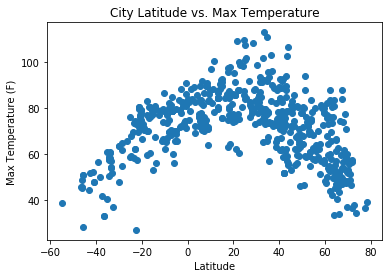

In [120]:
latitudep = clean_city_data["Lat"]
temperaturep = clean_city_data["Temp"]
plt.scatter(latitudep,temperaturep, marker="o")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("LATvsTEMPplot.png")
plt.show()

## Latitude vs. Humidity Plot

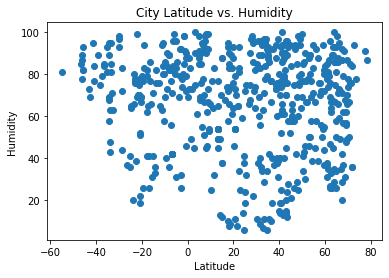

In [121]:
humidityp = clean_city_data["Humidity"]
plt.scatter(latitudep,humidityp, marker="o")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("LATvsHUMplot.png")
plt.show()

## Latitude vs. Cloudiness Plot

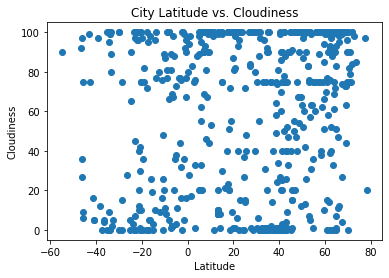

In [123]:
cloudinessp = clean_city_data["Cloudiness"]
plt.scatter(latitudep,cloudinessp, marker="o")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("LATvsCLOUDplot.png")
plt.show()

## Latitude vs. Wind Speed Plot

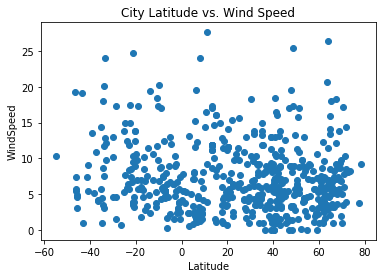

In [125]:
windspeedp = clean_city_data["WindSpeed"]
plt.scatter(latitudep,windspeedp, marker="o")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("WindSpeed")
plt.savefig("LATvsWINDplot.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression